# Credit Card Customer Segmentation
## The Scenario
You are a data scientist working for a credit card company. You're asked to help segment a dataset containing information about the company’s clients 
into different groups to enable the company to apply different business strategies for each type of customer.

## The Dataset
The dataset is named [customer segmentation](https://www.kaggle.com/datasets/yasserh/customer-segmentation-dataset) and it can be downloaded from Kaggle. We have been told that the data engineering team has already cleaned most of the data so we can focus on building the best possible model to segment the data. Also, in a planning meeting with the Data Science coordinator, it was decided that we should use the **`K-means`** algorithm to segment the data.

**It's worth noting that `k.means` is an `unsupervised` machine learning algorithm. In `segmentation` or `clustering`, all the columns are considered as features and there is no such thing as target.**

### Import the required libraries and modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Load and Explore the dataset

In [2]:
customers = pd.read_csv('customer_segmentation.csv')
print(customers.shape)
customers.head()

(10127, 14)


,customer_id,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
0,768805383,45,M,3,High School,Married,69000,39,5,1,12691.0,1144,42,0.061
1,818770008,49,F,5,Graduate,Single,24000,44,6,1,8256.0,1291,33,0.105
2,713982108,51,M,3,Graduate,Married,93000,36,4,1,3418.0,1887,20,0.000
3,769911858,40,F,4,High School,Unknown,37000,34,3,4,3313.0,1171,20,0.760
4,709106358,40,M,3,Uneducated,Married,65000,21,5,1,4716.0,816,28,0.000


### Dataset basic information
The dataset contains **`10,127`** rows or observation and **`14`** columns or features as follows:

* **customer_id**: unique identifier for each customer.
* **age**: customer age in years.
* **gender**: customer gender (M or F).
* **dependent_count**: number of dependents of each customer.
* **education_level**: level of education ("High School", "Graduate", etc.).
* **marital_status:** marital status ("Single", "Married", etc.).
* **estimated_income**: the estimated income for the customer projected by the data science team.
* **months_on_book**: time as a customer in months.
* **total_relationship_count**: number of times the customer contacted the company.
* **months_inactive_12_mon**: number of months the customer did not use the credit card in the last 12 months.
* **credit_limit**: customer's credit limit.
* **total_trans_amount**: the overall amount of money spent on the card by the customer.
* **total_trans_count**: the overall number of times the customer used the card.
* **avg_utilization_ratio**: daily average utilization ratio.

### Datatypes of the features

In [3]:
customers.dtypes

customer_id                   int64
age                           int64
gender                       object
dependent_count               int64
education_level              object
marital_status               object
estimated_income              int64
months_on_book                int64
total_relationship_count      int64
months_inactive_12_mon        int64
credit_limit                float64
total_trans_amount            int64
total_trans_count             int64
avg_utilization_ratio       float64
dtype: object

The fatures **gender** and **marital_status** are the only **categorical** daty types, the reat are **numerical** types.

### Checking for missing values

In [4]:
z = customers.isnull().sum()
print(f'Columns with missing values:\n{z[z > 0]}')

Columns with missing values:
Series([], dtype: int64)


### Checking some feature Distributions
#### Age

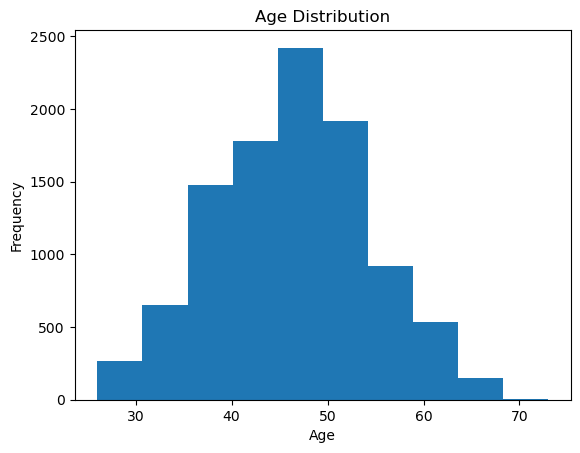

In [5]:
customers.age.plot.hist()
#customers.age.plot.kde()
plt.title('Age Distribution')
plt.xlabel('Age');

In [6]:
age_stats = customers.age.describe()
age_stats

count    10127.000000
mean        46.325960
std          8.016814
min         26.000000
25%         41.000000
50%         46.000000
75%         52.000000
max         73.000000
Name: age, dtype: float64

In [7]:
print(f'The mean age of customers: {age_stats["mean"]: .0f} years')
print(f'The median age of customers: {age_stats["50%"]: .0f} years')
print(f'The oldest customer: {age_stats["max"]: .0f} years')
print(f'The youngest customer: {age_stats["min"]: .0f} years')

The mean age of customers:  46 years
The median age of customers:  46 years
The oldest customer:  73 years
The youngest customer:  26 years


**The Age of the customers is normally distributed, with `mean = median`, and this is what is expected in real life.**

### Income

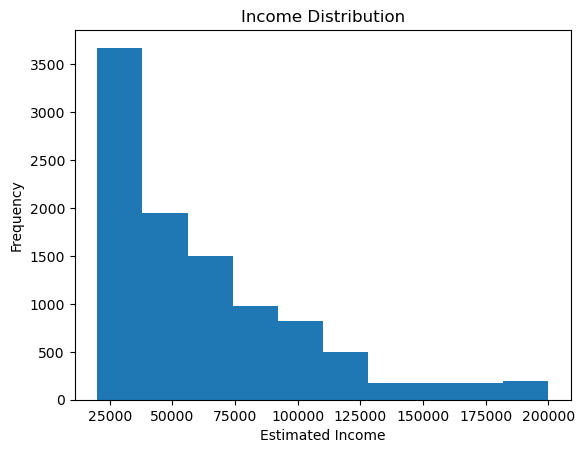

In [8]:
customers.estimated_income.plot.hist()
plt.title('Income Distribution')
plt.xlabel('Estimated Income');

In [9]:
income_stats = customers.estimated_income.describe()
income_stats

count     10127.000000
mean      62078.206774
std       39372.861291
min       20000.000000
25%       32000.000000
50%       50000.000000
75%       80000.000000
max      200000.000000
Name: estimated_income, dtype: float64

**As is often the case, income is right skewed! Meaning that few customers earns very high while the majority earns less!**

In [10]:
print(f'The mean est.income of customers: ${income_stats["mean"]: ,.0f}')
print(f'The median est.income of customers: ${income_stats["50%"]: ,.0f}')
print(f'The maximum est. income of customers: ${income_stats["max"]: ,.0f}')
print(f'The minimum est. income of customers: ${income_stats["min"]: ,.0f}')

The mean est.income of customers: $ 62,078
The median est.income of customers: $ 50,000
The maximum est. income of customers: $ 200,000
The minimum est. income of customers: $ 20,000


### Gender Distribution

In [11]:
gender_count = customers.gender.value_counts()
gender_count

gender
F    5358
M    4769
Name: count, dtype: int64

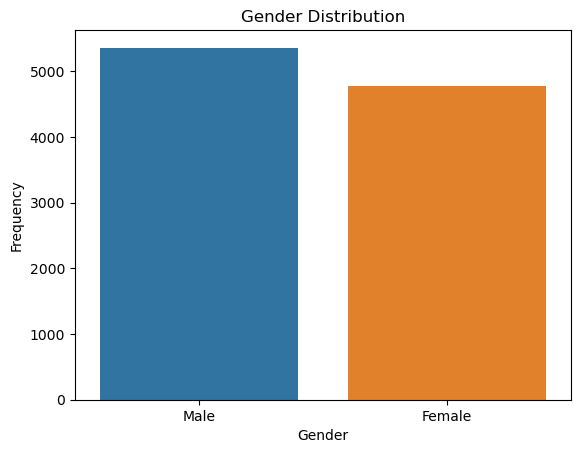

In [12]:
sns.barplot(x = gender_count.index, y = gender_count.values)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.xticks([0, 1], ['Male', 'Female'])
plt.ylabel('Frequency');

**This is a relatively balanced dataset in terms of gender distribution. This means males and females spend similar amounts**.

### Marital Status

In [13]:
marital_status = customers.marital_status.value_counts()
marital_status

marital_status
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: count, dtype: int64

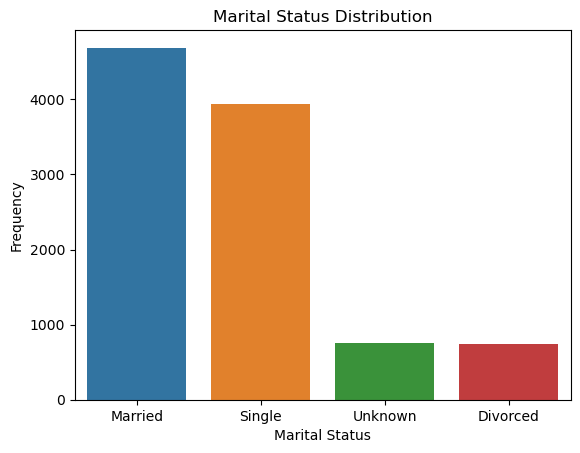

In [14]:
sns.barplot(x = marital_status.index, y = marital_status.values)
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Frequency');

**As expected, couples spend more than singles. It's rather surprising to see that singles spend more than divorced given that most divorcees have dependent like kids. It's also possible that some singles are either divorcess or have kids.**

### Education Level

In [15]:
education_level = customers.education_level.value_counts()
education_level

education_level
Graduate         3685
High School      2351
Uneducated       1755
College          1192
Post-Graduate     616
Doctorate         528
Name: count, dtype: int64

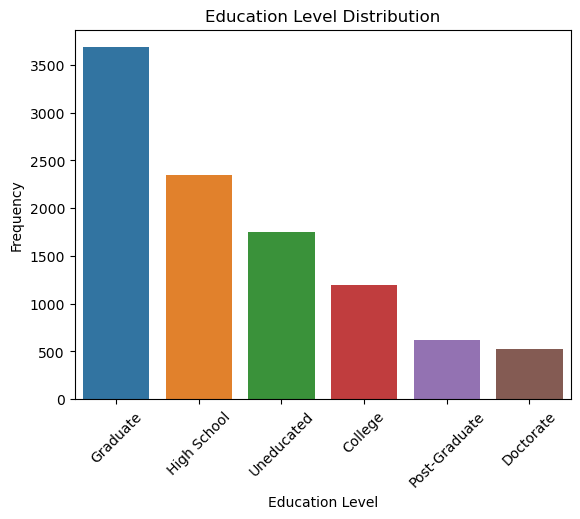

In [16]:
sns.barplot(x = education_level.index, y = education_level.values)
plt.title('Education Level Distribution')
plt.xlabel('Education Level')
plt.xticks(rotation = 45)
plt.ylabel('Frequency');

**The distribution of Education Level could be very imformative. Grauduates tend to be using credit cards more than Postgraduates and PhD's! It might be due to the excitement of earning money after graduation!**
###  Dependent Count

In [17]:
dependent_count = customers.dependent_count.value_counts()
dependent_count

dependent_count
3    2732
2    2655
1    1838
4    1574
0     904
5     424
Name: count, dtype: int64

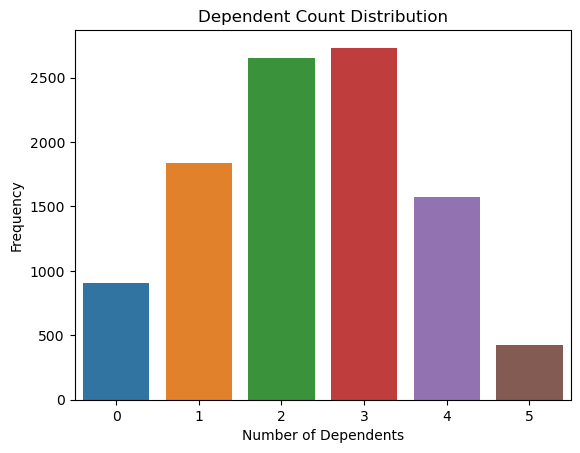

In [18]:
sns.barplot(x = dependent_count.index, y = dependent_count.values)
plt.title('Dependent Count Distribution')
plt.xlabel('Number of Dependents')
plt.ylabel('Frequency');

**A huge majority of the customers have `2` or `3` dependents followed by customers with `1` or `4`  dependents. Customers with `0` or `5` dependents are not very popular.**

### Total Transaction Count 

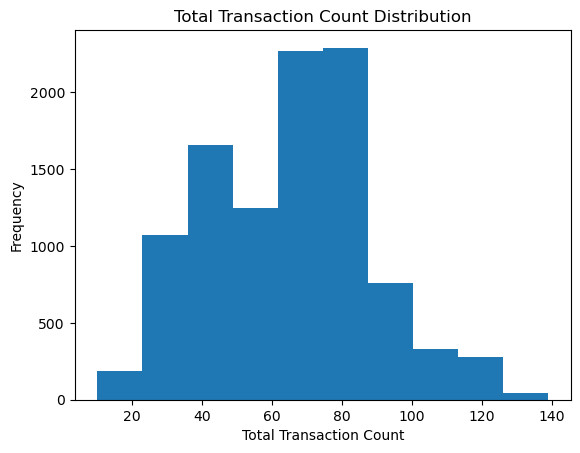

In [19]:
customers.total_trans_count.plot.hist()
plt.title('Total Transaction Count Distribution')
plt.xlabel('Total Transaction Count');

**The majority of the customers make between `30 - 90` transactions, with a peak between `70 - 90`**.

### Credit Limit

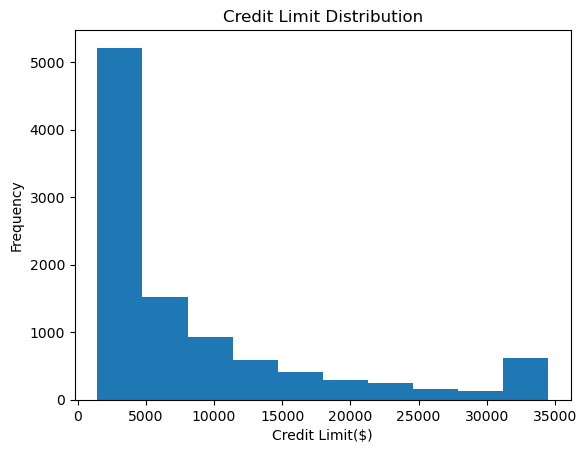

In [20]:
customers.credit_limit.plot.hist()
plt.title('Credit Limit Distribution')
plt.xlabel('Credit Limit($)');

**`Credit Limit Distribution` is also skewed to the right as expected. Credit card providers would usually allow only few of their trusted customers to spend more while the majority of the customers are allocated smaller limits in Dollar amount.** 

### Total Transaction Amount

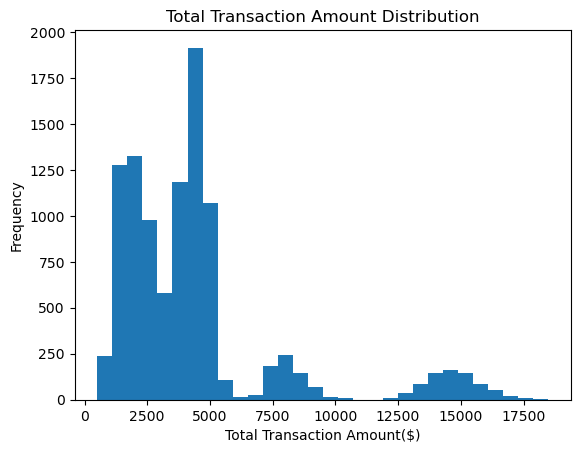

In [21]:
customers.total_trans_amount.plot.hist(bins = 30)
plt.title('Total Transaction Amount Distribution')
plt.xlabel('Total Transaction Amount($)');

**The distribution of `` Transaction Amount` indicates that most credit card holders exercise caution when spending. The majority of customers in this dataset spends between ``$2,000 - `$5,000`**.

In [22]:
months_inactive_12_mon = customers.months_inactive_12_mon.value_counts()
months_inactive_12_mon

months_inactive_12_mon
3    3846
2    3282
1    2233
4     435
5     178
6     124
0      29
Name: count, dtype: int64

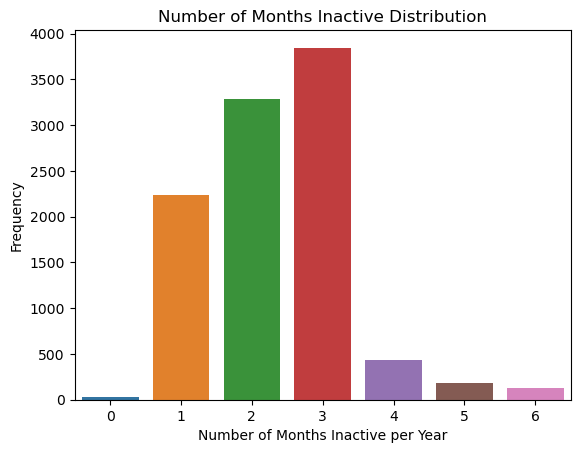

In [23]:
sns.barplot(x = months_inactive_12_mon.index, y = months_inactive_12_mon.values)
plt.title('Number of Months Inactive Distribution')
plt.xlabel('Number of Months Inactive per Year')
plt.ylabel('Frequency');

**The fewer the `Number of Months of Inactivity` the better for the credit card provider. The distribution show that the maximum number of months customers stay without using their cards is mostly `1 - 3` months!**

### Months on Book

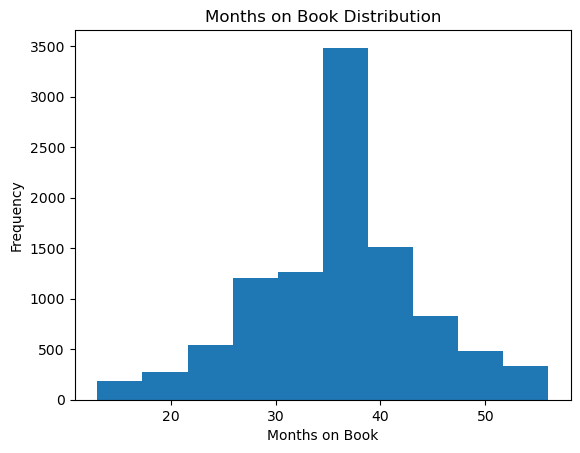

In [24]:
customers.months_on_book.plot.hist()
plt.title('Months on Book Distribution')
plt.xlabel('Months on Book');

**A huge majority of the customers has been with the bank for about `40` months.**
### Average Utilization Ratio

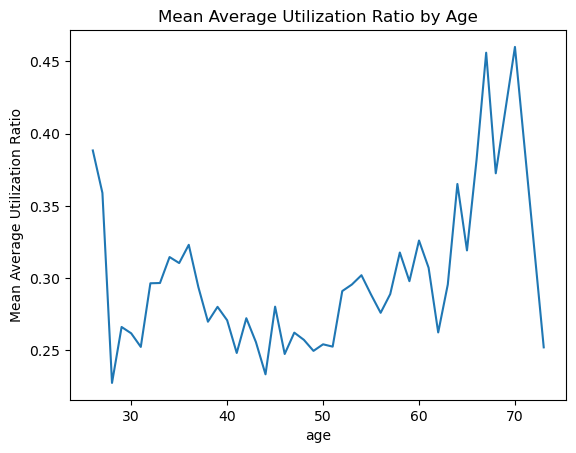

In [25]:
customers.groupby('age').avg_utilization_ratio.mean().plot()
plt.title('Mean Average Utilization Ratio by Age')
plt.ylabel('Mean Average Utilization Ratio');

**On average seniors citizens `60 years and above` seem to have high `daily average utilization ratio`.**

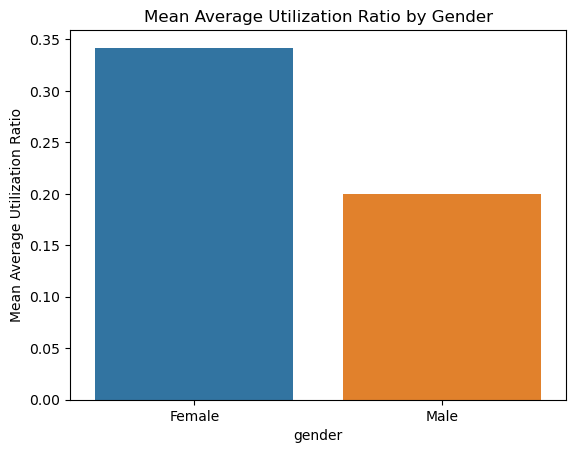

In [26]:
avg_util_gen = customers.groupby('gender').avg_utilization_ratio.mean()
sns.barplot(x = avg_util_gen.index, y = avg_util_gen.values)
plt.title('Mean Average Utilization Ratio by Gender')
plt.xticks([0, 1], ['Female', 'Male'])
plt.ylabel('Mean Average Utilization Ratio');

**On average female customers seem to utilize their cards on a daily basis more than their male counterpart.**

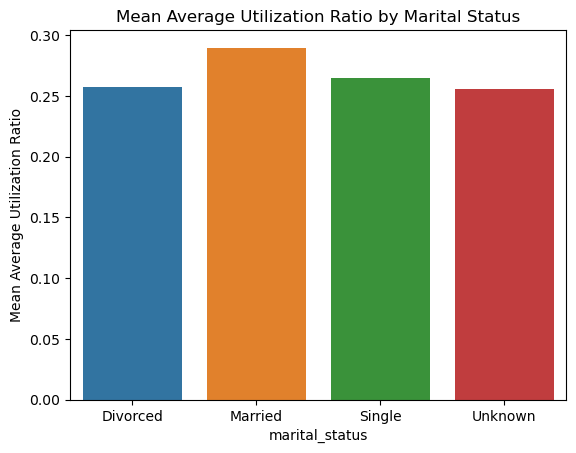

In [27]:
avg_util_ms = customers.groupby('marital_status').avg_utilization_ratio.mean()
sns.barplot(x = avg_util_ms.index, y = avg_util_ms.values)
plt.title('Mean Average Utilization Ratio by Marital Status')
plt.ylabel('Mean Average Utilization Ratio');

**The daily spending attitude is relatively independent of `marital staus`.**

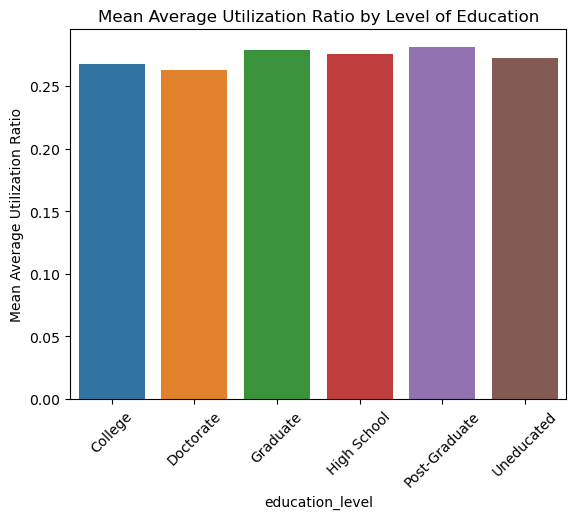

In [28]:
avg_util_edu = customers.groupby('education_level').avg_utilization_ratio.mean()
sns.barplot(x = avg_util_edu.index, y = avg_util_edu.values)
plt.title('Mean Average Utilization Ratio by Level of Education')
plt.xticks(rotation = 45)
plt.ylabel('Mean Average Utilization Ratio');

**The daily spending attitude is relatively independent of `Level of Education`**

## Feature Engineering

In [29]:
df = customers.copy()
df['gender'] = (df.gender == 'M').astype(int)

In [30]:
mapping = {'Uneducated': 0,
           'High School': 1,
           'College': 2,
           'Graduate': 3,
           'Post-Graduate': 4,
           'Doctorate': 5}

df['education_level'] = df.education_level.map(mapping)

In [31]:
df.head()

,customer_id,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
0,768805383,45,1,3,1,Married,69000,39,5,1,12691.0,1144,42,0.061
1,818770008,49,0,5,3,Single,24000,44,6,1,8256.0,1291,33,0.105
2,713982108,51,1,3,3,Married,93000,36,4,1,3418.0,1887,20,0.000
3,769911858,40,0,4,1,Unknown,37000,34,3,4,3313.0,1171,20,0.760
4,709106358,40,1,3,0,Married,65000,21,5,1,4716.0,816,28,0.000


**For the `marital_status` column, we'll use one-hot-encoding to create `dummy variables` from this column since there is no eminent ranking in the various statuses.**

In [32]:
df.dtypes

customer_id                   int64
age                           int64
gender                        int32
dependent_count               int64
education_level               int64
marital_status               object
estimated_income              int64
months_on_book                int64
total_relationship_count      int64
months_inactive_12_mon        int64
credit_limit                float64
total_trans_amount            int64
total_trans_count             int64
avg_utilization_ratio       float64
dtype: object

In [33]:
df = pd.get_dummies(df, drop_first = True)
df.head()

,customer_id,age,gender,dependent_count,education_level,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio,marital_status_Married,marital_status_Single,marital_status_Unknown
0,768805383,45,1,3,1,69000,39,5,1,12691.0,1144,42,0.061,True,False,False
1,818770008,49,0,5,3,24000,44,6,1,8256.0,1291,33,0.105,False,True,False
2,713982108,51,1,3,3,93000,36,4,1,3418.0,1887,20,0.000,True,False,False
3,769911858,40,0,4,1,37000,34,3,4,3313.0,1171,20,0.760,False,False,True
4,709106358,40,1,3,0,65000,21,5,1,4716.0,816,28,0.000,True,False,False


In [34]:
df.dtypes

customer_id                   int64
age                           int64
gender                        int32
dependent_count               int64
education_level               int64
estimated_income              int64
months_on_book                int64
total_relationship_count      int64
months_inactive_12_mon        int64
credit_limit                float64
total_trans_amount            int64
total_trans_count             int64
avg_utilization_ratio       float64
marital_status_Married         bool
marital_status_Single          bool
marital_status_Unknown         bool
dtype: object

## Scaling the Data
Most machine learning algorithms perform better when they use variables that are scaled to a certain range, and K-means is one of them. The core of the K-means algorithm is the **computation of distances between points**, either for **assigning clusters, calculating centroids, or calculating the inertia** generated by the split. Therefore, if the variables in the dataset are of incomparable magnitudes, this could be an issue.

**The `customer_id` is not a feature perse. We shall therefore not use it in our model.**

In [35]:
data = df.drop('customer_id', axis = 1)

In [36]:
def scaler(df):
    scaler = StandardScaler()
    scaler.fit(df)
    scaled = scaler.transform(df)
    return scaled

In [37]:
scaled_data = scaler(data)
scaled_data[:2]

array([[-0.16540558,  1.05995565,  0.50336813, -0.75221102,  0.1758098 ,
         0.38462088,  0.76394261, -1.32713603,  0.4466219 , -0.95970657,
        -0.97389518, -0.77588223,  1.07733799, -0.79850685, -0.28260887],
       [ 0.33357038, -0.9434357 ,  2.04319867,  0.66278684, -0.96716585,
         1.01071482,  1.40730617, -1.32713603, -0.04136665, -0.91643261,
        -1.35734038, -0.61627565, -0.92821381,  1.2523374 , -0.28260887]])

**We have to convert the scaled data to a DataFrame with appropriate columns because we shall need the `k-mean` algorithm give us statistics for the comuns**.

In [38]:
scaled_df = pd.DataFrame(scaled_data, columns = list(data))
scaled_df.head()

,age,gender,dependent_count,education_level,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio,marital_status_Married,marital_status_Single,marital_status_Unknown
0,-0.165406,1.059956,0.503368,-0.752211,0.175810,0.384621,0.763943,-1.327136,0.446622,-0.959707,-0.973895,-0.775882,1.077338,-0.798507,-0.282609
1,0.333570,-0.943436,2.043199,0.662787,-0.967166,1.010715,1.407306,-1.327136,-0.041367,-0.916433,-1.357340,-0.616276,-0.928214,1.252337,-0.282609
2,0.583058,1.059956,0.503368,0.662787,0.785397,0.008965,0.120579,-1.327136,-0.573698,-0.740982,-1.911206,-0.997155,1.077338,-0.798507,-0.282609
3,-0.789126,-0.943436,1.273283,-0.752211,-0.636973,-0.241473,-0.522785,1.641478,-0.585251,-0.951758,-1.911206,1.759686,-0.928214,-0.798507,3.538459
4,-0.789126,1.059956,0.503368,-1.459710,0.074212,-1.869317,0.763943,-1.327136,-0.430877,-1.056263,-1.570365,-0.997155,1.077338,-0.798507,-0.282609


## Choosing the number of clusters K
### Helper function to determine K

In [39]:
def plot_elbow_curve(df, max_clusters = 10):
    inertias = []
    for n_clusters in range(1, max_clusters + 1):
        model = KMeans(n_clusters, n_init = 'auto')
        model.fit_predict(df)
        inertias.append(model.inertia_)
    plt.plot(inertias, marker = 'o')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Inertias')
    plt.xlim([1, 10])
    plt.title('The Elbow Curve (Inertia Vs No. of Clusters)')
    plt.show()
    return inertias

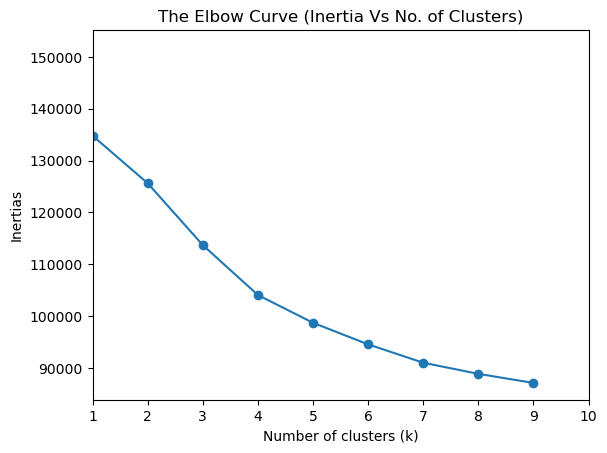

In [40]:
inertias = plot_elbow_curve(scaled_df, max_clusters = 10)

**From the curve the change from `k = 8` to `k = 9` could be considered small. Let's go with `k = 8` clusters so not number of clusters was explicitly given.**

## Train the model

In [41]:
model = KMeans(n_clusters = 8, n_init = 'auto')
clusters = model.fit_predict(scaled_df)
scaled_df['clusters'] = clusters + 1
print(scaled_df.clusters.value_counts())

clusters
5    1906
2    1660
4    1512
8    1426
7    1108
1     956
3     830
6     729
Name: count, dtype: int64


## Analyzing Results

In [42]:
print(f'Inertia: {model.inertia_}\n')
print(f'Number of Cluster centroids:\n{len(model.cluster_centers_)}\n')
print(f'Number of iterations: {model.n_iter_}\n')
print(f'Number of features: {model.n_features_in_}\n')
print(f'Feature names: {model.feature_names_in_}')

Inertia: 91007.34157060992

Number of Cluster centroids:
8

Number of iterations: 112

Number of features: 15

Feature names: ['age' 'gender' 'dependent_count' 'education_level' 'estimated_income'
 'months_on_book' 'total_relationship_count' 'months_inactive_12_mon'
 'credit_limit' 'total_trans_amount' 'total_trans_count'
 'avg_utilization_ratio' 'marital_status_Married' 'marital_status_Single'
 'marital_status_Unknown']


In [43]:
customers['clusters'] = clusters + 1

In [44]:
gender = customers.groupby('clusters').gender.value_counts(normalize = True).unstack().fillna(0)
gender

gender,F,M
clusters,,
1,0.682008,0.317992
2,0.648795,0.351205
3,0.366265,0.633735
4,0.019841,0.980159
5,0.989507,0.010493
6,0.517147,0.482853
7,0.049639,0.950361
8,0.685133,0.314867


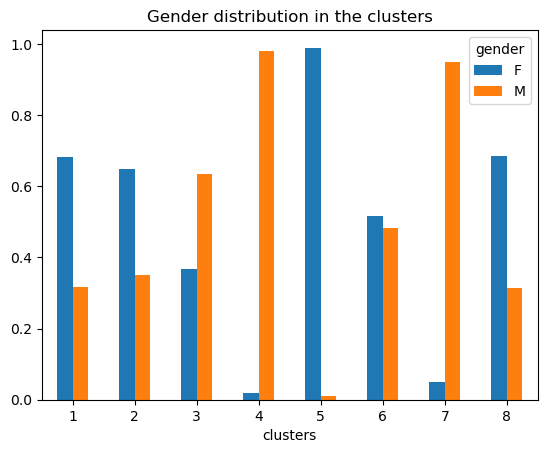

In [45]:
gender.plot.bar()
plt.xticks(rotation = 0)
plt.title('Gender distribution in the clusters');

**Male and Female customers are not evenly distributed among the clusters.**

In [46]:
education = customers.groupby('clusters').education_level.value_counts(normalize = True).unstack().fillna(0)
education

education_level,College,Doctorate,Graduate,High School,Post-Graduate,Uneducated
clusters,,,,,,
1,0.111925,0.070084,0.360879,0.236402,0.053347,0.167364
2,0.118675,0.042771,0.356024,0.242169,0.056024,0.184337
3,0.107229,0.046988,0.354217,0.250602,0.059036,0.181928
4,0.117725,0.041005,0.373677,0.237434,0.068783,0.161376
5,0.124869,0.058237,0.373557,0.223505,0.060860,0.158972
6,0.112483,0.039781,0.355281,0.240055,0.079561,0.172840
7,0.119134,0.047834,0.345668,0.236462,0.050542,0.200361
8,0.118513,0.067321,0.375877,0.205470,0.062412,0.170407


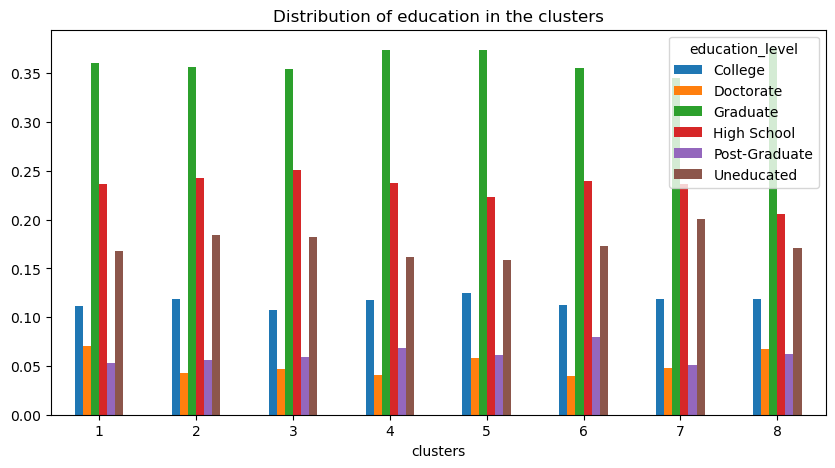

In [47]:
education.plot.bar(figsize = (10, 5))
plt.xticks(rotation = 0)
plt.title('Distribution of education in the clusters');

**`Education Level` is relatively evenly distributed among the clusters**.

In [48]:
marital_status = customers.groupby('clusters').marital_status.value_counts(normalize = True).unstack().fillna(0)
marital_status

marital_status,Divorced,Married,Single,Unknown
clusters,,,,
1,0.049163,0.950837,0.000000,0.000000
2,0.043976,0.000000,0.956024,0.000000
3,0.089157,0.500000,0.387952,0.022892
4,0.089947,0.910053,0.000000,0.000000
5,0.123820,0.876180,0.000000,0.000000
6,0.000000,0.000000,0.000000,1.000000
7,0.118231,0.286101,0.594765,0.000903
8,0.035764,0.000000,0.964236,0.000000


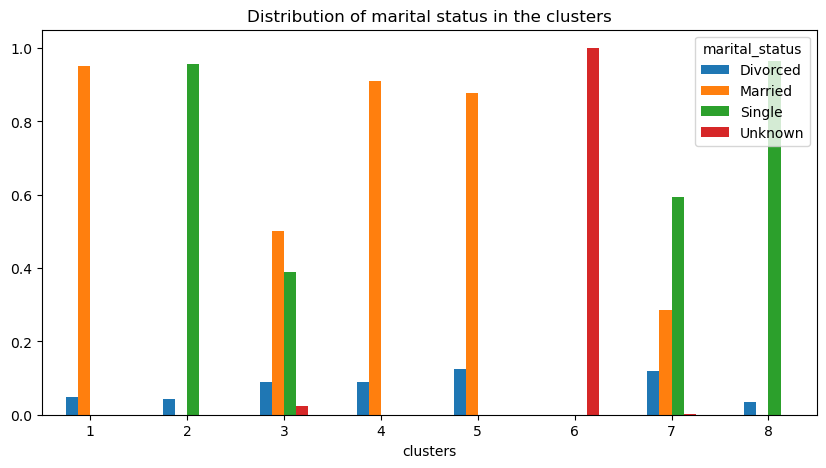

In [49]:
marital_status.plot.bar(figsize = (10, 5))
plt.xticks(rotation = 0)
plt.title('Distribution of marital status in the clusters');

**`Marital Status` is not evenly distributed among the clusters**.

### Check Correlation between pairs of features

In [50]:
correlations = scaled_df.corr().abs()
correlations

,age,gender,dependent_count,education_level,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio,marital_status_Married,marital_status_Single,marital_status_Unknown,clusters
age,1.000000,0.017312,0.122254,0.005895,0.032922,0.788912,0.010931,0.054361,0.002476,0.046446,0.067097,0.007114,0.047364,0.011248,0.026694,0.195480
gender,0.017312,1.000000,0.004563,0.012931,0.601792,0.006728,0.003157,0.011163,0.420806,0.024890,0.067454,0.257851,0.011427,0.015756,0.012307,0.048059
dependent_count,0.122254,0.004563,1.000000,0.003957,0.051620,0.103062,0.039076,0.010768,0.068065,0.025046,0.049912,0.037135,0.014385,0.040707,0.041743,0.069276
education_level,0.005895,0.012931,0.003957,1.000000,0.024990,0.009446,0.002744,0.001912,0.011718,0.011857,0.010577,0.002189,0.009639,0.007477,0.001157,0.014169
estimated_income,0.032922,0.601792,0.051620,0.024990,1.000000,0.027628,0.007181,0.002703,0.515863,0.015861,0.039988,0.277532,0.020485,0.018926,0.000253,0.150653
months_on_book,0.788912,0.006728,0.103062,0.009446,0.027628,1.000000,0.009203,0.074164,0.007507,0.038591,0.049819,0.007541,0.033194,0.005065,0.026145,0.165861
total_relationship_count,0.010931,0.003157,0.039076,0.002744,0.007181,0.009203,1.000000,0.003675,0.071386,0.347229,0.241891,0.067663,0.017001,0.017329,0.009376,0.038389
months_inactive_12_mon,0.054361,0.011163,0.010768,0.001912,0.002703,0.074164,0.003675,1.000000,0.020394,0.036982,0.042787,0.007503,0.007065,0.008973,0.005053,0.080099
credit_limit,0.002476,0.420806,0.068065,0.011718,0.515863,0.007507,0.071386,0.020394,1.000000,0.171730,0.075927,0.482965,0.056713,0.032309,0.025291,0.229072
total_trans_amount,0.046446,0.024890,0.025046,0.011857,0.015861,0.038591,0.347229,0.036982,0.171730,1.000000,0.807192,0.083034,0.063030,0.044772,0.026283,0.066672


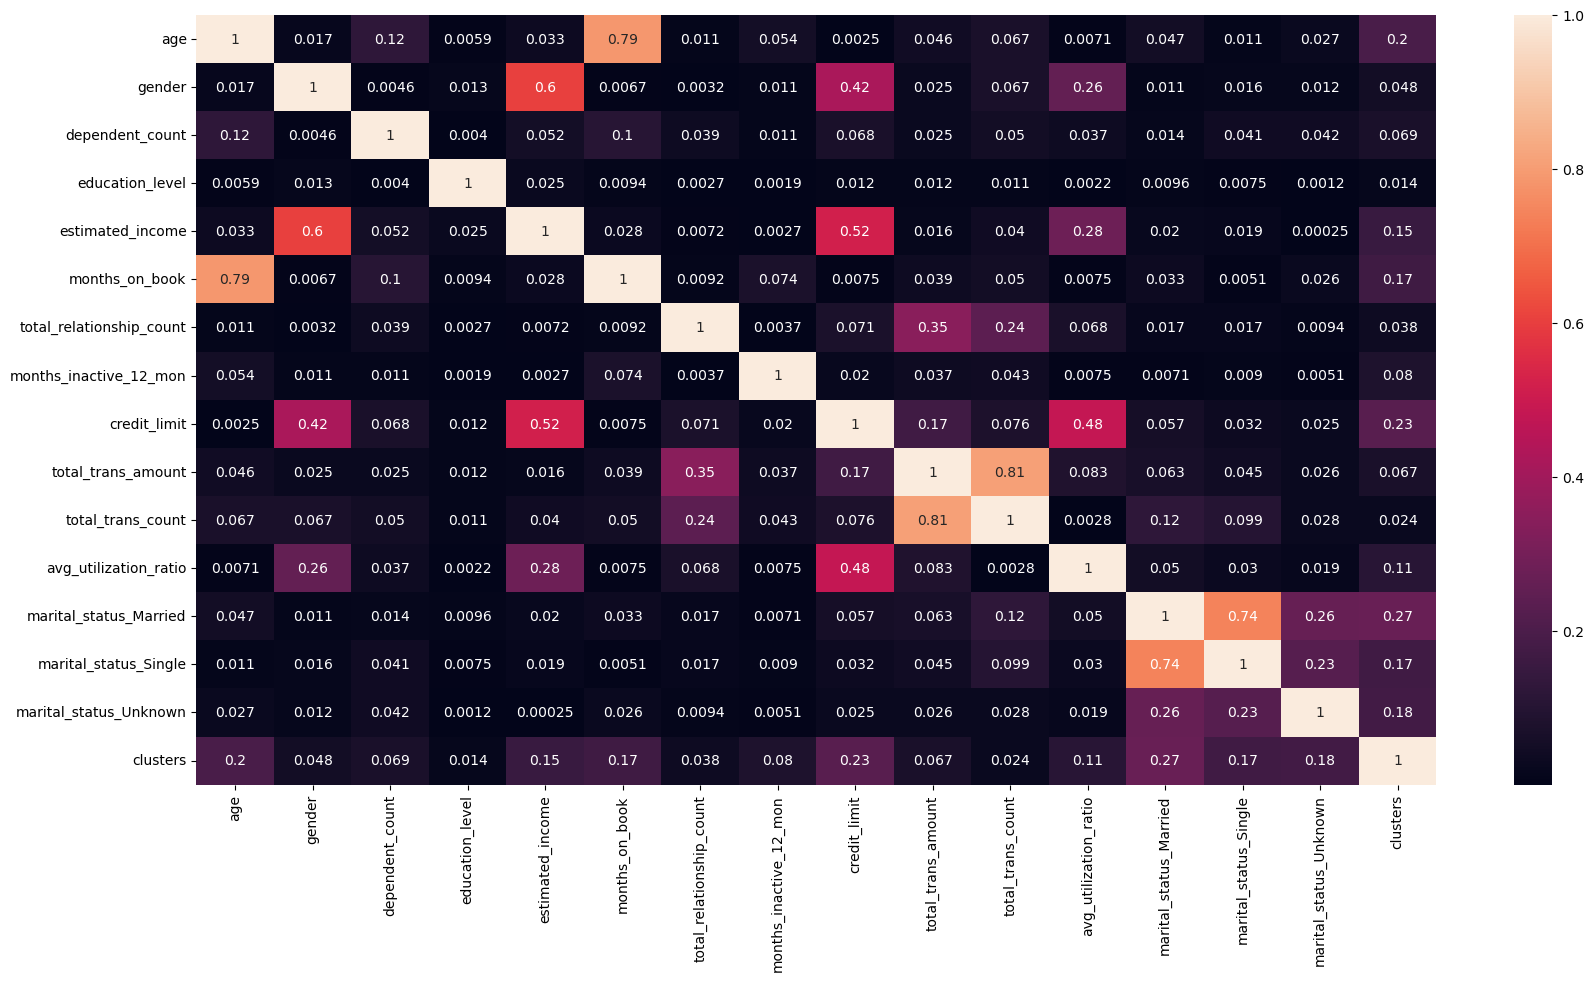

In [51]:
plt.figure(figsize = (20, 10))
sns.heatmap(correlations, annot = True)
plt.xticks(rotation = 90);

## Analysing the clusters
### Cluster Centriods

In [52]:
centroids = pd.DataFrame(model.cluster_centers_, columns = model.feature_names_in_)
centroids

,age,gender,dependent_count,education_level,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio,marital_status_Married,marital_status_Single,marital_status_Unknown
0,1.261582,-0.306374,-0.819018,0.030774,-0.293788,1.153616,0.245752,-0.009477,-0.465729,-0.574761,-0.758107,0.418720,0.978739,-0.798507,-0.282609
1,-0.883943,-0.239411,0.078267,-0.054521,-0.346801,-0.774502,0.199303,-0.122273,-0.377244,-0.242000,-0.037817,0.135451,-0.928214,1.162095,-0.282609
2,-0.155636,0.326183,-0.029079,-0.045564,0.135201,-0.114746,-1.025848,-0.139690,0.627383,2.760385,1.857080,-0.373396,0.074562,-0.002878,-0.195139
3,-0.287511,1.020232,0.160901,0.006725,0.590007,-0.279295,0.220081,-0.002084,-0.046426,-0.417879,-0.445035,-0.175380,0.897064,-0.798507,-0.282609
4,-0.296302,-0.922414,0.319170,0.046231,-0.646434,-0.282074,0.023703,0.011804,-0.487567,-0.170468,0.002667,0.328390,0.829012,-0.798507,-0.282609
5,-0.084981,0.023908,0.152735,-0.010744,-0.014878,-0.081385,-0.002092,-0.003680,0.057767,0.014069,0.044125,-0.055886,-0.928214,-0.798507,3.538459
6,0.111465,0.960419,0.207782,-0.076668,1.439863,0.112578,0.033402,-0.005070,1.862529,-0.191735,-0.185221,-0.812668,-0.355717,0.422366,-0.279157
7,0.930541,-0.313076,-0.361505,0.065354,-0.350157,0.821439,-0.089517,0.222008,-0.388248,-0.126849,0.061135,0.185502,-0.928214,1.179042,-0.282609


### Clusters 1 and 2

In [53]:
mask = (customers.clusters == 1) | (customers.clusters == 2)
cus_data = customers.loc[mask]

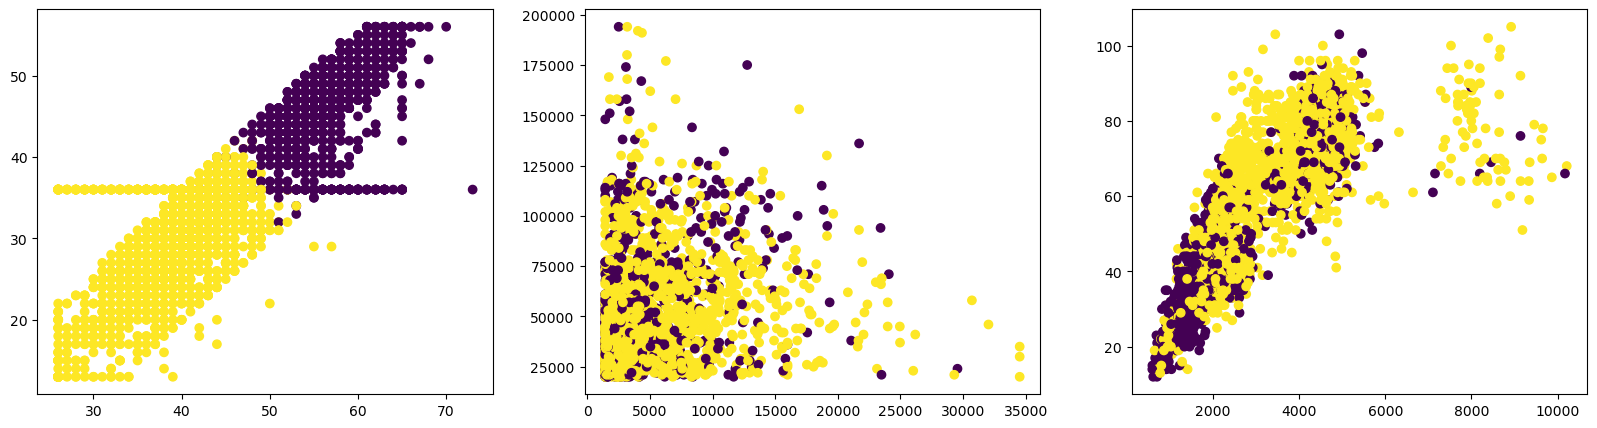

In [54]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 5))

ax[0].scatter(cus_data.age, cus_data.months_on_book, c = cus_data.clusters)
ax[1].scatter(cus_data.credit_limit, cus_data.estimated_income, c = cus_data.clusters)
ax[2].scatter(cus_data.total_trans_amount, cus_data.total_trans_count, c = cus_data.clusters);

### Clusters 3 and 4

In [55]:
mask = (customers.clusters == 3) | (customers.clusters == 4)
cus_data = customers.loc[mask]

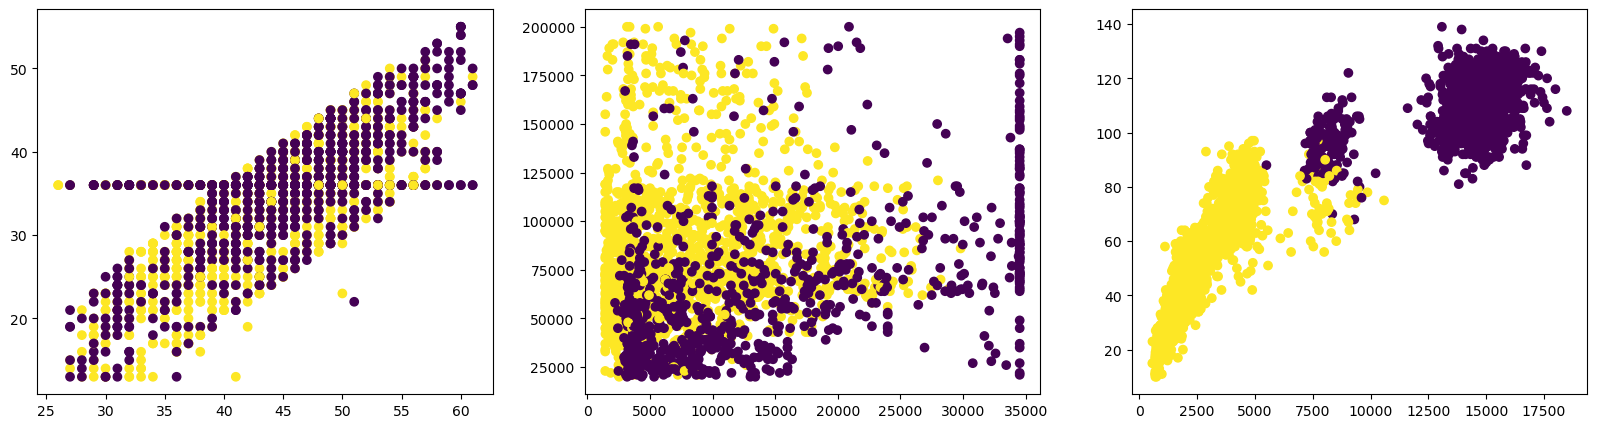

In [56]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 5))

ax[0].scatter(cus_data.age, cus_data.months_on_book, c = cus_data.clusters)
ax[1].scatter(cus_data.credit_limit, cus_data.estimated_income, c = cus_data.clusters)
ax[2].scatter(cus_data.total_trans_amount, cus_data.total_trans_count, c = cus_data.clusters);

### Clusters 5 and 6

In [57]:
mask = (customers.clusters == 5) | (customers.clusters == 6)
cus_data = customers.loc[mask]

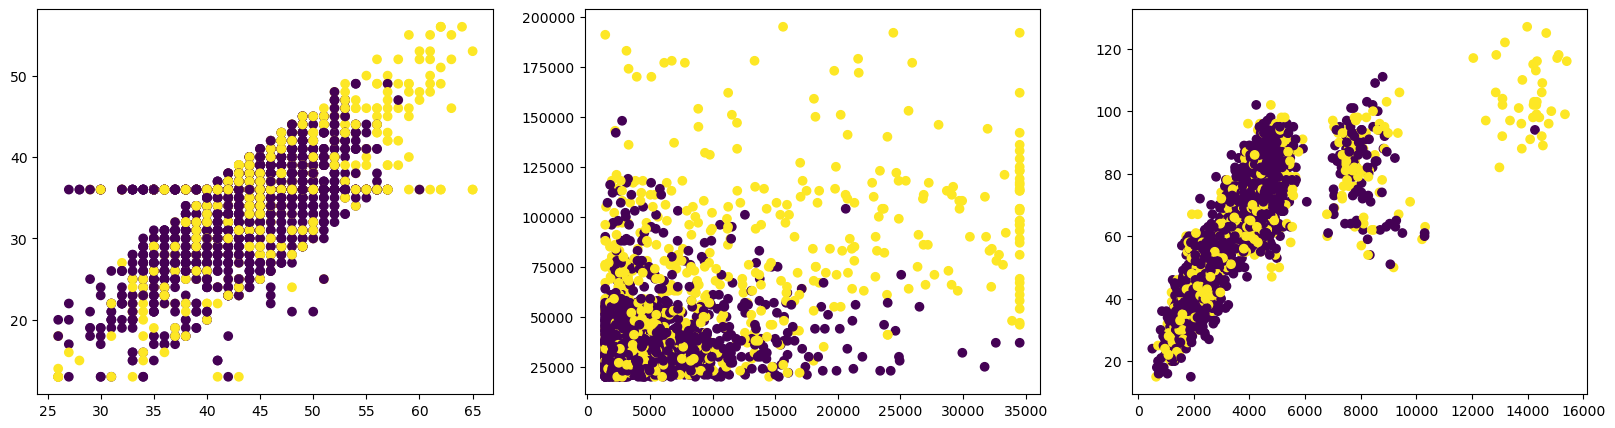

In [58]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 5))

ax[0].scatter(cus_data.age, cus_data.months_on_book, c = cus_data.clusters)
ax[1].scatter(cus_data.credit_limit, cus_data.estimated_income, c = cus_data.clusters)
ax[2].scatter(cus_data.total_trans_amount, cus_data.total_trans_count, c = cus_data.clusters);

### Clusters 7 and 8

In [59]:
mask = (customers.clusters == 7) | (customers.clusters == 8)
cus_data = customers.loc[mask]

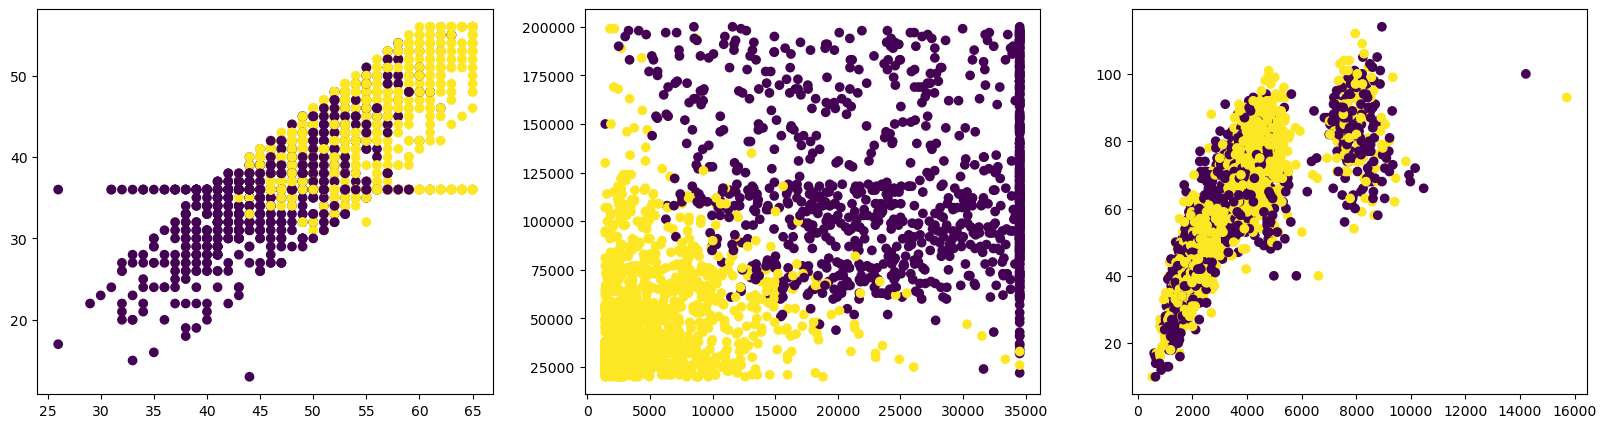

In [60]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 5))

ax[0].scatter(cus_data.age, cus_data.months_on_book, c = cus_data.clusters)
ax[1].scatter(cus_data.credit_limit, cus_data.estimated_income, c = cus_data.clusters)
ax[2].scatter(cus_data.total_trans_amount, cus_data.total_trans_count, c = cus_data.clusters);

**We succeeded in splitting the dataset into `8 clusters`. However, a more powerful and multiple dimension visualization tool would be required to fully visualize the clusters graphically.**

### A 3D View of the clusters

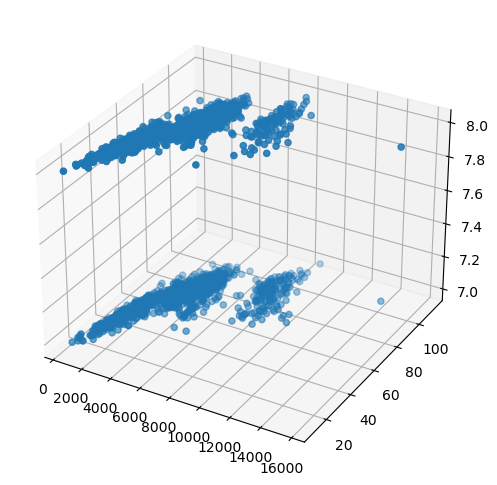

In [61]:
x, y, z = zip(*cus_data.loc[:, ['total_trans_amount', 'total_trans_count', 'clusters']].values)
fig = plt.figure(figsize = (15, 6))
ax = plt.axes(projection = '3d')
ax.scatter(x, y, z)
plt.show()